Градиентный спуск: w = 4.9797, b = 49.9280


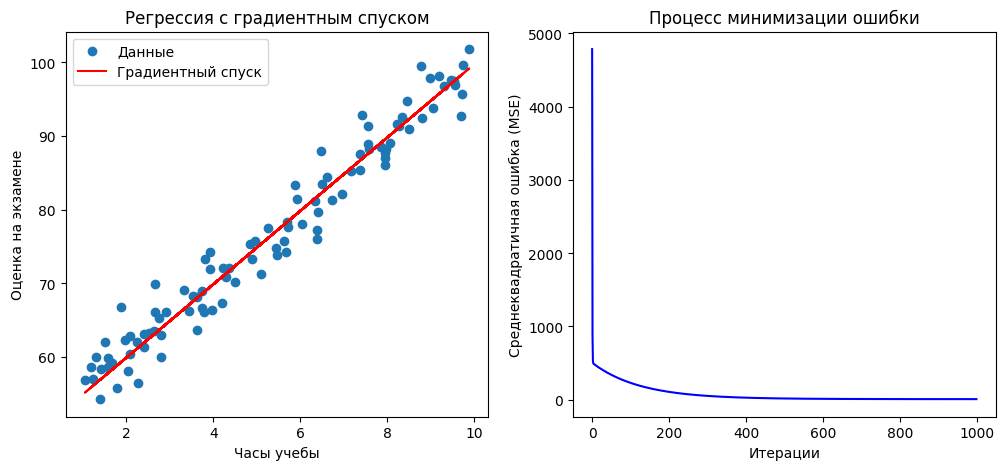

Качество модели (R^2) Градиентный спуск: 0.9574
Финальное значение MSE (Градиентный спуск): 7.4153


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация синтетических данных (количество часов учебы -> оценка на экзамене)
np.random.seed(42)
X = 1 + 9 * np.random.rand(100, 1)  # Часы учебы
y = 50 + 5 * X + np.random.randn(100, 1) * 3  # Оценки с шумом

# Добавление столбца единиц для смещения (bias)
X_b = np.c_[np.ones((100, 1)), X]

# Инициализация параметров для градиентного спуска
w = np.random.randn(2, 1)  # [b, w]
learning_rate = 0.01
n_iterations = 1000
m = len(X_b)

# Функция потерь (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Градиентный спуск
losses = []
for iteration in range(n_iterations):
    y_pred = X_b.dot(w)
    error = y_pred - y
    gradients = (2 / m) * X_b.T.dot(error)
    w -= learning_rate * gradients
    loss = mse(y, y_pred)
    losses.append(loss)

# Финальные параметры
b_final, w_final = w.flatten()
print(f"Градиентный спуск: w = {w_final:.4f}, b = {b_final:.4f}")

# Визуализация процесса обучения
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, label="Данные")
plt.plot(X, w_final * X + b_final, color='red', label="Градиентный спуск")
plt.xlabel("Часы учебы")
plt.ylabel("Оценка на экзамене")
plt.legend()
plt.title("Регрессия с градиентным спуском")

# График ошибки (MSE)
plt.subplot(1, 2, 2)
plt.plot(range(n_iterations), losses, color='blue')
plt.xlabel("Итерации")
plt.ylabel("Среднеквадратичная ошибка (MSE)")
plt.title("Процесс минимизации ошибки")
plt.show()

# Оценка качества модели (R^2)
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

r2_gd = r2_score(y, X_b.dot(w))
print(f"Качество модели (R^2) Градиентный спуск: {r2_gd:.4f}")

# Вывод финального MSE
final_mse = mse(y, X_b.dot(w))
print(f"Финальное значение MSE (Градиентный спуск): {final_mse:.4f}")
